<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.1 일반화 : 머신 러닝의 목표 **굵은 텍스트**
**5.1.1 과소적합과 과대적합**

MNIST에 백색 잡음 픽셀과 0픽셀 추가하기

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _= mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
tarin_images = train_images.astype("float32")/255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
      ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size = 128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size = 128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 15s 37ms/step - loss: 5.6660 - accuracy: 0.8897 - val_loss: 0.8284 - val_accuracy: 0.9421
Epoch 2/10
375/375 [==============================] - 10s 26ms/step - loss: 0.6560 - accuracy: 0.9497 - val_loss: 0.6320 - val_accuracy: 0.9501
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.4598 - accuracy: 0.9628 - val_loss: 0.7200 - val_accuracy: 0.9512
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 0.3540 - accuracy: 0.9704 - val_loss: 0.5990 - val_accuracy: 0.9622
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 0.3232 - accuracy: 0.9750 - val_loss: 0.7381 - val_accuracy: 0.9613
Epoch 6/10
375/375 [==============================] - 8s 20ms/step - loss: 0.2680 - accuracy: 0.9783 - val_loss: 0.7363 - val_accuracy: 0.9636
Epoch 7/10
375/375 [==============================] - 7s 17ms/step - loss: 0.2360 - accuracy: 0.9814 - val_loss: 0.7404 - val_accuracy: 0.96

검증 정확도 비교 그래프 그리기

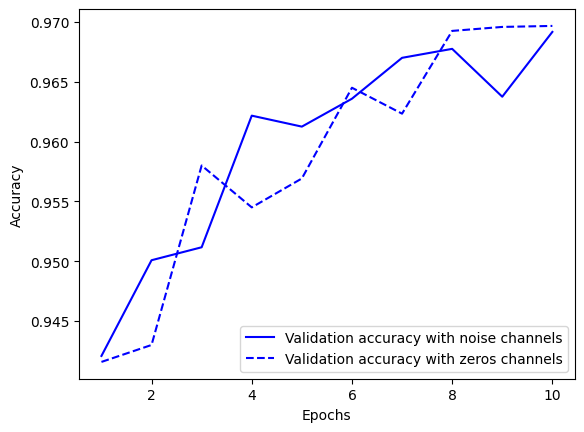

In [3]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs=range(1,11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()